In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# データ読み込み
dataset = pd.read_csv("kaggle_housing_price.csv")

In [3]:
# データを最初の5行だけ表示
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 下記の列を使用する
target_col = 'SalePrice'
feature_cols = ['OverallQual', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

In [5]:
# target_colとfeature_colsをarrayにして、それぞれをY、Xとする
Y = np.array(dataset[target_col])
X = np.array(dataset[feature_cols])
print(Y)
print(X)

[208500 181500 223500 ... 266500 142125 147500]
[[   7 1710  854  706    5]
 [   6 1262    0  978    8]
 [   7 1786  866  486    5]
 ...
 [   7 2340 1152  275    9]
 [   5 1078    0   49    6]
 [   5 1256    0  830    6]]


In [6]:
# DataをTrain　: Test = 7　:　3に分ける
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3)

In [7]:
# Trainを7:3 に分ける
X_train7, X_train3, Y_train7, Y_train3 = train_test_split(X_train, Y_train,test_size = 0.3)

In [8]:
# 回帰分析を実施し、検証用データMSEを算出
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train7,Y_train7)
from sklearn.metrics import mean_squared_error
test_pre=model.predict(X_train3)
mean_squared_error(Y_train3,test_pre)

1633952847.118934

In [9]:
#決定木を実行し、検証用データでMSEを算出
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train7,Y_train7)
#dtc.fit(X_train7,Y_train7)
test_pre2=dtc.predict(X_train3)
mean_squared_error(Y_train3,test_pre2)

3083767341.7785015

In [10]:
# ランダムフォレストを実行し、検証用データでMSEを算出
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train7,Y_train7)
test_pre3=rfc.predict(X_train3)
mean_squared_error(Y_train3,test_pre3)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3225859249.4918566

In [11]:
# Test dataを用いてMSEを算出し、予測精度を確認
test_pre4=rfc.predict(X_test)
mean_squared_error(Y_test,test_pre4)

2707247932.082192

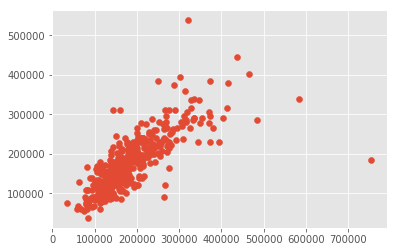

In [12]:
# 横軸：実際の成約価格、縦軸：予測した成約価格で散布図を作成し予測の誤差を確認
plt.scatter(Y_test, test_pre4)

(array([  2.,  15.,  89., 167., 104.,  40.,  13.,   3.,   1.,   4.]),
 array([-0.75529801, -0.56193604, -0.36857407, -0.17521211,  0.01814986,
         0.21151183,  0.4048738 ,  0.59823577,  0.79159774,  0.98495971,
         1.17832168]),
 <a list of 10 Patch objects>)

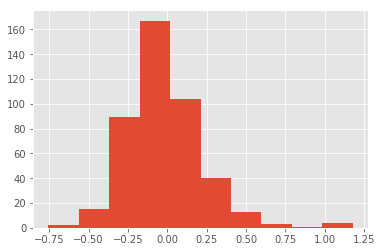

In [13]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示
gosa=(test_pre4-Y_test)/Y_test
plt.hist(gosa)